In [1]:
# get train file names
import glob

train_folders = ['CAR', 'UAH', 'UJITI', 'UJIUB']

files_names = []
n_files = 0
for building in train_folders:
    cur_file_names = glob.glob('train/' + building + '/log*')
    files_names.append(sorted(cur_file_names))
    n_files += len(cur_file_names)

print(files_names)
print('There are %d files' % n_files)

[['train/CAR/logfile_CAR_R1_S3.txt', 'train/CAR/logfile_CAR_R1_S3mini.txt', 'train/CAR/logfile_CAR_R2_S3.txt', 'train/CAR/logfile_CAR_R2_S4.txt'], ['train/UAH/logfile_UAH_R1_S3.txt', 'train/UAH/logfile_UAH_R1_S4.txt', 'train/UAH/logfile_UAH_R2_S3.txt', 'train/UAH/logfile_UAH_R2_S4.txt', 'train/UAH/logfile_UAH_R4_S3.txt', 'train/UAH/logfile_UAH_R4_S4.txt'], ['train/UJITI/logfile_UJITI_R1_NEXUS5.txt', 'train/UJITI/logfile_UJITI_R2_NEXUS5.txt'], ['train/UJIUB/logfile_UJIUB_R1n_S3.txt', 'train/UJIUB/logfile_UJIUB_R1r_S3.txt', 'train/UJIUB/logfile_UJIUB_R2n_S3.txt', 'train/UJIUB/logfile_UJIUB_R2r_S3.txt', 'train/UJIUB/logfile_UJIUB_R3_S3.txt']]
There are 17 files


In [2]:
# import files into dataframes
import numpy as np
import pandas as pd

track= []
for building in files_names:
    track.append([])
    for track_name in building:
        print(track_name)
        track[-1].append(pd.read_csv(track_name, sep=';', engine='c', names=range(11)))
        print(np.unique(track[-1][-1][0]))

train/CAR/logfile_CAR_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/CAR/logfile_CAR_R1_S3mini.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'MAGN' 'POSI' 'SOUN' 'WIFI']
train/CAR/logfile_CAR_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX' 'SOUN'
 'WIFI']
train/CAR/logfile_CAR_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'PROX'
 'SOUN' 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R1_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logfile_UAH_R1_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R2_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logfile_UAH_R2_S4.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'HUMI' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN'
 'TEMP' 'WIFI']
train/UAH/logfile_UAH_R4_S3.txt
['ACCE' 'AHRS' 'GNSS' 'GYRO' 'LIGH' 'MAGN' 'POSI' 'PRES' 'SOUN' 'WIFI']
train/UAH/logf

/usr/local/lib/python3.4/dist-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Find time limits per POSI id
def posi_time_limits(pos_array):
    # create start and end index time array
    pos_array['ind_begin_time'] = np.zeros((pos_array.shape[0]))
    pos_array['ind_end_time'] = np.zeros((pos_array.shape[0]))
    pos_array['ind_end_time'].iloc[-1] = 99999

    for i in range(1, pos_array.shape[0]):
        cur_split = (float(pos_array['Time'].iloc[i]) + float(pos_array['Time'].iloc[i-1])) / 2
        pos_array['ind_begin_time'].iat[i] = cur_split       
        pos_array['ind_end_time'].iat[i-1] = cur_split       
    return pos_array

# create true ground dataframes
pos = []
for i in range(len(track)):
    pos.append([])
    for j in range(len(track[i])):
        pos[i].append(track[i][j][[1, 2, 3, 4, 5, 6, 7]].iloc[track[i][j][0].values == 'POSI'])
        pos[i][j] = pos[i][j].dropna(axis=1)
        pos[i][j].columns = ['Time', 'index', 'Lat', 'Lon', 'FloorID', 'BuildingID']
        pos[i][j] = posi_time_limits(pos[i][j])

i = 1
j = 2
print(files_names[i][j])
print(pos[i][j].shape[0])
print(pos[i][j]['FloorID'].values)
print(pos[i][j].head())

train/UAH/logfile_UAH_R2_S3.txt
64
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  2.  1.  0.  0.  0.  0.  0.  0.]
         Time  index          Lat       Lon  FloorID  BuildingID  \
4142    8.618    1.0  40.51278407  -3.34849      0.0        20.0   
16724  34.656    2.0  40.51296307  -3.34844      0.0        20.0   
24993  51.802    3.0  40.51296539  -3.34859      0.0        20.0   
32452  67.263    4.0  40.51302711  -3.34866      0.0        20.0   
39755  82.372    5.0  40.51307726  -3.34879      0.0        20.0   

       ind_begin_time  ind_end_time  
4142           0.0000       21.6370  
16724         21.6370       43.2290  
24993         43.2290       59.5325  
32452         59.5325       74.8175  
39755         74.8175       92.8480  


/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
# associate signals with POSI ids. Spliting at middle of the time between POSI measurements using posi_time_limits
for i in range(len(track)):
    for j in range(len(track[i])):
        track[i][j]['POSI_floor'] = np.zeros((track[i][j].shape[0])) * np.nan
        track[i][j]['POSI_building'] = np.zeros((track[i][j].shape[0])) * np.nan
        for k in range(pos[i][j].shape[0]):
            ind_begin_time = pos[i][j]['ind_begin_time'].iloc[k]
            ind_end_time = pos[i][j]['ind_end_time'].iloc[k]
    
            ind = pos[i][j]['index'].iloc[k]
            ind_floor = pos[i][j]['FloorID'].iloc[k]
            ind_building = pos[i][j]['BuildingID'].iloc[k]
            
            index_limits = np.logical_and(track[i][j][1].values >= ind_begin_time, 
                                          track[i][j][1].values < ind_end_time)
            
            track[i][j]['POSI_floor'].iloc[index_limits] = ind_floor
            track[i][j]['POSI_building'].iloc[index_limits] = ind_building

print(track[i][j].head())

      0      1       2         3        4         5        6        7  \
0  GYRO  0.018  89.931   0.58521  0.41692  -0.74526  3.00000      NaN   
1  AHRS  0.019  89.931   36.8048   5.5949 -32.75710  0.31558 -0.04448   
2  LIGH  0.020  89.940    2124.0        0       NaN      NaN      NaN   
3  ACCE  0.020  89.941  -1.38864  6.10043   7.44118  3.00000      NaN   
4  GYRO  0.031  89.951  -0.48686  0.38546   0.01344  3.00000      NaN   

         8     9  10  POSI_floor  POSI_building  
0      NaN   NaN NaN         0.0           30.0  
1 -0.25246 -43.0 NaN         0.0           30.0  
2      NaN   NaN NaN         0.0           30.0  
3      NaN   NaN NaN         0.0           30.0  
4      NaN   NaN NaN         0.0           30.0  


/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
# Pad ground truth in order to use interpolation later
for i in range(len(track)):
    for j in range(len(track[i])):
        pos_pad_start = pos[i][j].iloc[0]
        pos_pad_start.at['Time'] = 0
        pos_pad_end = pos[i][j].iloc[-1]
        pos_pad_end.at['Time'] = track[i][j][1].values[-1]
        pos_array = np.vstack((pos_pad_start.values.reshape((1, pos[i][j].shape[1])), 
                                pos[i][j].values, 
                                pos_pad_end.values.reshape((1, pos[i][j].shape[1]))))
        pos[i][j] = pd.DataFrame(pos_array, columns=pos[i][j].columns.values)

In [6]:
# Interpolate sensors' time
import scipy.interpolate as interpolate

for i in range(len(track)):
    for j in range(len(track[i])):
        interp_ground_truth_lat = interpolate.interp1d(pos[i][j]['Time'].astype(float), pos[i][j]['Lat'])
        track[i][j]['interp_lat'] = interp_ground_truth_lat(track[i][j][1])
        interp_ground_truth_lon = interpolate.interp1d(pos[i][j]['Time'].astype(float), pos[i][j]['Lon'])
        track[i][j]['interp_lon'] = interp_ground_truth_lon(track[i][j][1])
print(track[0][0].head())

      0      1         2         3          4          5        6       7  \
0  ACCE  0.094  4292.788  -1.38864    4.62560    8.40844  3.00000     NaN   
1  MAGN  0.095  4292.788  -5.64000  -39.72000  -19.56000  3.00000     NaN   
2  GYRO  0.097  4292.792  -0.16432   -0.20861   -0.19609  3.00000     NaN   
3  AHRS  0.098  4292.792   28.5264     9.6349 -161.85360  0.11909 -0.2296   
4  LIGH  0.098  4292.792   14561.0          3        NaN      NaN     NaN   

        8    9  10  POSI_floor  POSI_building  interp_lat  interp_lon  
0     NaN  NaN NaN         0.0           10.0   40.313471    -3.48315  
1     NaN  NaN NaN         0.0           10.0   40.313471    -3.48315  
2     NaN  NaN NaN         0.0           10.0   40.313471    -3.48315  
3 -0.9504  3.0 NaN         0.0           10.0   40.313471    -3.48315  
4     NaN  NaN NaN         0.0           10.0   40.313471    -3.48315  


In [7]:
# Create wifi data frames
wifi = []
for i in range(len(track)):
    wifi.append([])
    for j in range(len(track[i])):
        wifi[-1].append(track[i][j][[1, 4, 5, 'POSI_floor', 'POSI_building', 'interp_lat',  
                                    'interp_lon']].iloc[track[i][j][0].values == 'WIFI'])
        wifi[-1][-1].columns = ['AppTime', 'MAC', 'rssi', 'POSI_floor', 'POSI_building', 'interp_lat', 'interp_lon']
print(wifi[0][0].head())

     AppTime                MAC  rssi  POSI_floor  POSI_building  interp_lat  \
637    2.293  00:0b:86:27:36:c2 -82.0         0.0           10.0   40.313471   
638    2.293  00:0b:86:27:32:e0 -66.0         0.0           10.0   40.313471   
639    2.293  00:0b:86:27:32:e2 -66.0         0.0           10.0   40.313471   
640    2.293  00:0b:86:27:32:e1 -68.0         0.0           10.0   40.313471   
641    2.293  00:0b:86:27:36:c0 -82.0         0.0           10.0   40.313471   

     interp_lon  
637    -3.48315  
638    -3.48315  
639    -3.48315  
640    -3.48315  
641    -3.48315  


In [8]:
# split to different tracks in order to not overfit while testing
route_numbering = [[0, 0, 1, 1], [2, 2, 3, 3, 4, 4], [5, 6], [7, 7, 8, 8, 9]]
test_route = 1

#### total macs
742
#### building macs
0 51 ,
1 353 ,
2 158 ,
3 180 ,
#### floor macs
10 0 51 ,
10 1 0 ,
10 2 0 ,
10 3 0 ,
10 4 0 ,
10 5 0 ,
20 0 221 ,
20 1 310 ,
20 2 285 ,
20 3 0 ,
20 4 0 ,
20 5 0 ,
30 0 82 ,
30 1 66 ,
30 2 78 ,
30 3 62 ,
30 4 45 ,
30 5 125 ,
40 0 0 ,
40 1 108 ,
40 2 134 ,
40 3 123 ,
40 4 0 ,
40 5 0 ,


## Train test split should be in effect from here

In [9]:
# Only for the train data
# create list of mac addresses for all the samples
total_macs = []
print('total macs')
for i in range(len(wifi)):
    for j in range(len(wifi[i])):
        if route_numbering[i][j] != test_route:
            track_mac_array = wifi[i][j]['MAC'].values
            for mac_add in track_mac_array:
                if not mac_add in total_macs:
                    total_macs.append(mac_add)
print(len(total_macs))

# create list of mac addresses for each building
building_macs = {10: [], 20: [], 30: [], 40: []}
for i in range(len(wifi)):
    for j in range(len(wifi[i])):
        if route_numbering[i][j] != test_route:
            track_mac_array = wifi[i][j]
            for k in range(track_mac_array.shape[0]):
                mac_line = track_mac_array.iloc[k]
                mac = mac_line['MAC']
                build = int(mac_line['POSI_building'])
                if not mac in building_macs[build]:
                    building_macs[build].append(mac)
print('building macs')
for build in sorted(building_macs):
    print(build, len(building_macs[build]), ',')

# create list of mac addresses for each building for each floor
floor_macs = {10: [[], [], [], [], [], []], 20: [[], [], [], [], [], []], 
              30: [[], [], [], [], [], []], 40: [[], [], [], [], [], []]}
for i in range(len(wifi)):
    for j in range(len(wifi[i])):
        if route_numbering[i][j] != test_route:
            track_mac_array = wifi[i][j]
            for k in range(track_mac_array.shape[0]):
                mac_line = track_mac_array.iloc[k]
                mac = mac_line['MAC']
                build = int(mac_line['POSI_building'])
                floor = int(mac_line['POSI_floor'])
                if not mac in floor_macs[build][floor]:
                    floor_macs[build][floor].append(mac)

print('floor macs')
for build in sorted(floor_macs):
    for j in range(len(floor_macs[build])):
        print(build, j, len(floor_macs[build][j]), ',')

total macs
734
building macs
10 43 ,
20 353 ,
30 180 ,
40 158 ,
floor macs
10 0 43 ,
10 1 0 ,
10 2 0 ,
10 3 0 ,
10 4 0 ,
10 5 0 ,
20 0 338 ,
20 1 253 ,
20 2 244 ,
20 3 176 ,
20 4 0 ,
20 5 0 ,
30 0 82 ,
30 1 66 ,
30 2 78 ,
30 3 62 ,
30 4 45 ,
30 5 125 ,
40 0 0 ,
40 1 108 ,
40 2 134 ,
40 3 123 ,
40 4 0 ,
40 5 0 ,


In [10]:
# Make WiFi data into global dummy variable
def dummify_wifi(wifi_df, wifi_list):
    wifi_samples = np.unique(wifi_df['AppTime'].values)
    wifi_dummy = np.ones((wifi_samples.shape[0], len(wifi_list))) * -200
    wifi_dummy = pd.DataFrame(wifi_dummy, columns=wifi_list, index=wifi_samples)
    for i, sample_time in enumerate(wifi_samples):
            wifi_cur = wifi_df.iloc[wifi_df['AppTime'].values == sample_time]
            for j in range(wifi_cur.shape[0]):
                if str(wifi_cur['MAC'].iat[j]) in wifi_list:
                    wifi_dummy[wifi_cur['MAC'].iat[j]].iat[i] = wifi_cur['rssi'].iat[j]
    return wifi_dummy

# Normalize wifi and cut noise
def normalize_wifi(wifi_dummy_df):
    max_per_line = np.amax(wifi_dummy_df, axis=1)
    wifi_dummy_df.iloc[:, :] = wifi_dummy_df.values - max_per_line.reshape((max_per_line.shape[0], 1))
    return wifi_dummy_df

# Add ground truth columnns to the wifi dataframe
def add_results_wifi(df, results_df):
    df['POSI_building'] = np.ones((df.shape[0],))
    df['POSI_floor'] = np.ones((df.shape[0],))
    df['interp_lat'] = np.ones((df.shape[0],))
    df['interp_lon'] = np.ones((df.shape[0],))
    wifi_samples = df.index.values
    for i, sample_time in enumerate(wifi_samples):
        results_cur = results_df.iloc[results_df['AppTime'].values == sample_time]
        for j in range(results_cur.shape[0]):
            df['POSI_building'].iat[i] = results_cur['POSI_building'].iat[0]
            df['POSI_floor'].iat[i] = results_cur['POSI_floor'].iat[0]
            df['interp_lat'].iat[i] = results_cur['interp_lat'].iat[0]
            df['interp_lon'].iat[i] = results_cur['interp_lon'].iat[0]
    return df

# Use different MACs as dummy variables in each time sample with RSSI as value
wifi_dummy_total = []
for i in range(len(wifi)):
    wifi_dummy_total.append([])
    for j in range(len(wifi[i])):
        print(i, j)
        wifi_dummy_total[i].append(dummify_wifi(wifi[i][j], total_macs))
        wifi_dummy_total[i][j] = normalize_wifi(wifi_dummy_total[i][j])
        wifi_dummy_total[i][j] = add_results_wifi(wifi_dummy_total[i][j], wifi[i][j])
print(wifi_dummy_total[0][0].head())

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
1 4
1 5
2 0
2 1
3 0
3 1
3 2
3 3
3 4
        00:0b:86:27:36:c2  00:0b:86:27:32:e0  00:0b:86:27:32:e2  \
2.293               -16.0                0.0                0.0   
8.276               -15.0                0.0                0.0   
14.269              -20.0                0.0               -3.0   
18.284              -19.0               -1.0               -2.0   
24.253              -16.0                0.0                0.0   

        00:0b:86:27:32:e1  00:0b:86:27:36:c0  00:0b:86:27:36:c1  \
2.293                -2.0              -16.0              -16.0   
8.276                 0.0              -15.0              -18.0   
14.269               -3.0              -20.0              -21.0   
18.284                0.0              -18.0              -18.0   
24.253                0.0              -17.0              -15.0   

        00:0b:86:27:35:90  00:0b:86:27:35:92  00:0b:86:27:35:91  \
2.293               -18.0              -15.0              -

## Building classification

In [11]:
# Make WiFi data into dummy variable with the buildingIDs as values. 
# In each row the number of MACs associated with the buildingID is the value
def dummify_wifi_building(wifi_df, wifi_building_list):
    wifi_samples = np.unique(wifi_df['AppTime'].values)
    wifi_dummy = np.zeros((wifi_samples.shape[0], len(wifi_building_list)))
    wifi_dummy = pd.DataFrame(wifi_dummy, columns=list(wifi_building_list.keys()), index=wifi_samples)
    for i, sample_time in enumerate(wifi_samples):
            wifi_cur = wifi_df.iloc[wifi_df['AppTime'].values == sample_time]
            for j in range(wifi_cur.shape[0]):
                for k in wifi_building_list:
                    if str(wifi_cur['MAC'].iat[j]) in wifi_building_list[k]:
                        wifi_dummy[k].iat[i] += 1
    return wifi_dummy

# Create WiFi dataframe 
wifi_dummy_building = []
for i in range(len(wifi)):
    wifi_dummy_building.append([])
    for j in range(len(wifi[i])):
        print(i, j)
        wifi_dummy_building[i].append(dummify_wifi_building(wifi[i][j], building_macs))
        wifi_dummy_building[i][j] = add_results_wifi(wifi_dummy_building[i][j], wifi[i][j])
print(wifi_dummy_building[0][0].head())
# print(wifi_dummy_building[1][0].head())
# print(wifi_dummy_building[2][0].head())
# print(wifi_dummy_building[3][0].head())

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
1 4
1 5
2 0
2 1
3 0
3 1
3 2
3 3
3 4
         40    10   20   30  POSI_building  POSI_floor  interp_lat  interp_lon
2.293   0.0  15.0  0.0  0.0           10.0         0.0   40.313471    -3.48315
8.276   0.0  15.0  0.0  0.0           10.0         0.0   40.313471    -3.48315
14.269  0.0  18.0  0.0  0.0           10.0         0.0   40.313471    -3.48315
18.284  0.0  16.0  0.0  0.0           10.0         0.0   40.313471    -3.48315
24.253  0.0  13.0  0.0  0.0           10.0         0.0   40.313471    -3.48315


In [12]:
# Train building on Random Forest using WiFi fingerprinting
from sklearn.ensemble import RandomForestClassifier

train_build = []
for i in range(len(wifi_dummy_total)):
    for j in range(len(wifi_dummy_total[i])):
        if route_numbering[i][j] != test_route:
            train_build.append(wifi_dummy_building[i][j])

# concat all train dataframes into one
train_build = pd.concat(train_build, axis=0)
train_build_results = train_build['POSI_building']
train_build = train_build[[10, 20, 30, 40]]

# Train RF
rfc_build = RandomForestClassifier(n_estimators=100, max_depth=4 ,max_features=1, random_state=2016)
rfc_build.fit(train_build.values, train_build_results.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=1, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=2016, verbose=0,
            warm_start=False)

In [13]:
# Create test routes in order to evaluate the method
test_build = []
test_wifi_build = []
for i in range(len(wifi_dummy_building)):
    for j in range(len(wifi_dummy_building[i])):
        if route_numbering[i][j] == test_route:
            test_build.append(wifi_dummy_building[i][j][[10, 20, 30, 40]])
            test_wifi_build.append(wifi_dummy_total[i][j]['POSI_building'])
print(test_build[0].head())

          10   20   30   40
2.779   18.0  0.0  0.0  0.0
6.787   18.0  0.0  0.0  0.0
10.785  18.0  0.0  0.0  0.0
14.794  18.0  0.0  0.0  0.0
18.848  18.0  0.0  0.0  0.0


In [14]:
# Predict test routes using the RF algorithm. Predict for all the test data
predicted_build = []
predicted_build_proba = []
for i in range(len(test_build)):
    predicted_build.append(rfc_build.predict(test_build[i].values))
    predicted_build_proba.append(rfc_build.predict_proba(test_build[i].values))
    print(i, np.sum(predicted_build[i] == test_wifi_build[i].values) / test_wifi_build[i].shape[0])

0 1.0
1 1.0


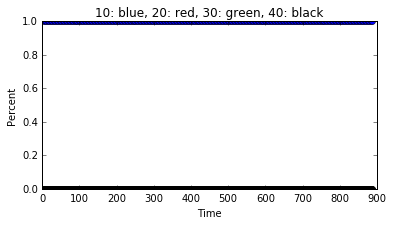

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

route = 0
# Plot building results. 100% of the points are true
plt.figure(1, figsize=(6, 3))
plt.plot(test_build[route].index.values, predicted_build_proba[route][:, 0], 'bo', 
         test_build[route].index.values, predicted_build_proba[route][:, 1], 'ro', 
         test_build[route].index.values, predicted_build_proba[route][:, 2], 'go', 
         test_build[route].index.values, predicted_build_proba[route][:, 3], 'ko')
plt.xlabel('Time')
plt.ylabel('Percent')
plt.title('10: blue, 20: red, 30: green, 40: black')
plt.show()

In [16]:
# wifi train data with noise and all the macs
train_wifi = []
train_results = []
for i in range(len(wifi_dummy_total)):
    for j in range(len(wifi_dummy_total[i])):
        if route_numbering[i][j] != test_route:
            train_wifi.append(wifi_dummy_total[i][j])
train_wifi = pd.concat(train_wifi, axis=0)

# Create test routes using the dummy WiFi dataframe with all the MACs
test_wifi = []
test_wifi_floor = []
test_wifi_lat = []
test_wifi_lng = []
for i in range(len(wifi_dummy_total)):
    for j in range(len(wifi_dummy_total[i])):
        if route_numbering[i][j] == test_route:
            test_wifi.append(wifi_dummy_total[i][j])
            test_wifi_floor.append(wifi_dummy_total[i][j]['POSI_floor'])
            test_wifi_lat.append(wifi_dummy_total[i][j]['interp_lat'])
            test_wifi_lng.append(wifi_dummy_total[i][j]['interp_lon'])
print(test_wifi[0].head())

        00:0b:86:27:36:c2  00:0b:86:27:32:e0  00:0b:86:27:32:e2  \
2.779                -2.0              -22.0              -27.0   
6.787                -9.0              -23.0              -30.0   
10.785                0.0              -21.0              -24.0   
14.794               -7.0              -25.0              -22.0   
18.848              -14.0              -23.0              -23.0   

        00:0b:86:27:32:e1  00:0b:86:27:36:c0  00:0b:86:27:36:c1  \
2.779               -24.0                0.0               -2.0   
6.787               -28.0               -1.0              -10.0   
10.785              -25.0               -1.0               -1.0   
14.794              -27.0               -6.0               -6.0   
18.848              -25.0              -13.0              -15.0   

        00:0b:86:27:35:90  00:0b:86:27:35:92  00:0b:86:27:35:91  \
2.779              -133.0             -133.0             -133.0   
6.787              -134.0             -134.0             -13

## Floor classification

In [17]:
# level noise when packets have lower power than it
def wifi_level_noise(wifi_dummy_df, noise):
    if len(wifi_dummy_df.shape) > 1:
        noise_not = (wifi_dummy_df.values >= noise) * 1
        wifi_dummy_df.iloc[:, :] = noise_not * wifi_dummy_df.values + (1- noise_not) * noise
    else:
        noise_not = (wifi_dummy_df.values >= noise) * 1
        wifi_dummy_df.iloc[:] = noise_not * wifi_dummy_df.values + (1- noise_not) * noise
    return wifi_dummy_df

# filter train samples by buildings in order to train floors
train_floor = {10: 0, 20: 0, 30: 0, 40: 0}
train_floor_results = {10: 0, 20: 0, 30: 0, 40: 0}
for building in train_floor:
    train_floor[building] = train_wifi.iloc[train_build_results.values == building][building_macs[building]]
    train_floor[building] = wifi_level_noise(train_floor[building], -10)
    train_floor_results[building] = train_wifi.iloc[train_build_results.values == building]['POSI_floor']

In [18]:
# Train floor on Random Forest using WiFi fingerprinting
from sklearn.ensemble import RandomForestClassifier
rfc_floor = {10: 0, 20: 0, 30: 0, 40: 0}
for building in rfc_floor:
    rfc_floor[building] = RandomForestClassifier(n_estimators=1000, max_depth=20 ,max_features=1.0, random_state=2016)
    rfc_floor[building].fit(train_floor[building].values, train_floor_results[building].values)

In [19]:
# Predict floors
predicted_floor = []
predicted_floor_proba = []
for test_i in range(len(test_wifi)):
    predicted_floor.append([])
    predicted_floor_proba.append([])
    for row_i in range(test_wifi[test_i].shape[0]):
        cur_pred_build = predicted_build[test_i][row_i]
        cur_measurement = test_wifi[test_i][building_macs[cur_pred_build]].iloc[row_i]
        cur_measurement = wifi_level_noise(cur_measurement, -10)
        predicted_floor[test_i].append(int(rfc_floor[cur_pred_build].predict([cur_measurement.values])))
# print(predicted_floor)

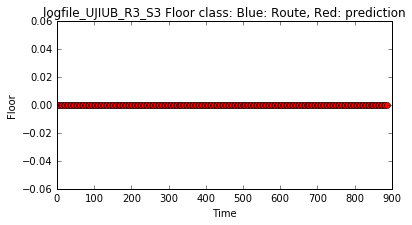

In [20]:
route = 0
# Plot results
plt.figure(1, figsize=(6, 3))
plt.plot(test_build[route].index.values, test_wifi_floor[route], 'b', 
         test_build[route].index.values, predicted_floor[route], 'ro')
plt.xlabel('Time')
plt.ylabel('Floor')
plt.title('logfile_UJIUB_R3_S3 Floor class: Blue: Route, Red: prediction')
plt.show()

In [21]:
# Create train for 2D positioning using WiFi fingerprinting
train_2d = {10: [[], [], [], [], [], []], 20: [[], [], [], [], [], []], 
            30: [[], [], [], [], [], []], 40: [[], [], [], [], [], []]}
train_2d_lat = {10: [[], [], [], [], [], []], 20: [[], [], [], [], [], []], 
                30: [[], [], [], [], [], []], 40: [[], [], [], [], [], []]}
train_2d_lon = {10: [[], [], [], [], [], []], 20: [[], [], [], [], [], []], 
                30: [[], [], [], [], [], []], 40: [[], [], [], [], [], []]}
train_2d_grid_results = {10: [[], [], [], [], [], []], 20: [[], [], [], [], [], []], 
                         30: [[], [], [], [], [], []], 40: [[], [], [], [], [], []]}

# Split train data into floors
for i in range(len(wifi_dummy_total)):
    for j in range(len(wifi_dummy_total[i])):
        if route_numbering[i][j] != test_route:
            track_mac_array = wifi_dummy_total[i][j]
            for k in range(track_mac_array.shape[0]):
                mac_line = track_mac_array.iloc[k]
                build = int(mac_line['POSI_building'])
                floor = int(mac_line['POSI_floor'])
                lat = float(mac_line['interp_lat'])
                lon = float(mac_line['interp_lon'])
                train_2d[build][floor].append(mac_line[floor_macs[build][floor]].values.reshape((1, len(floor_macs[build][floor]))))
                train_2d_lat[build][floor].append(lat)
                train_2d_lon[build][floor].append(lon)

# Concat samples inside each floor
for build in train_2d:
    for floor in range(len(train_2d[build])):
        if len(train_2d[build][floor]):
            train_2d[build][floor] = np.vstack(tuple(train_2d[build][floor]))
            train_2d[build][floor] = pd.DataFrame(train_2d[build][floor], columns=floor_macs[build][floor])
print(train_2d[40][1].head())

   00:1a:a1:5c:f9:61  90:f6:52:ff:cd:72  90:f6:52:ff:cd:71  00:1a:a1:5c:f9:60  \
0              -19.0              -33.0              -21.0              -23.0   
1              -22.0              -29.0              -20.0              -23.0   
2              -20.0              -32.0              -23.0              -20.0   
3               -3.0              -20.0               -7.0               -3.0   
4               -4.0              -17.0               -5.0               -4.0   

   00:1a:6d:9b:9a:21  00:13:c3:44:d8:21  00:1a:6d:9b:9a:20  00:13:c3:44:d8:20  \
0                0.0              -36.0                0.0              -30.0   
1               -1.0              -32.0                0.0              -32.0   
2                0.0              -40.0               -1.0              -40.0   
3                0.0              -17.0                0.0              -18.0   
4               -1.0               -9.0                0.0              -10.0   

   00:13:c3:44:d8:e1  00:1

## Grid

In [22]:
# Change measurement from meters to differnial earth angle
def mtod_calc(local_latitude, mes_m):
    local_radius = 6378137 * np.cos(np.pi * local_latitude / 180)
    mes_d = 360 * mes_m / (local_radius * 2 * np.pi)
    return mes_d

# Create the grid for fingerprinting
class GridTrain:
    def __init__(self, lat_samples, lon_samples, resolution_m, rssis, translate, classifier):
        self.lat_lim = (np.min(lat_samples), np.max(lat_samples))
        self.lon_lim = (np.min(lon_samples), np.max(lon_samples))
        self.lat_loc = np.median(lat_samples)
        self.resolution = mtod_calc(self.lat_loc, resolution_m)
        self.lat_grid_start = self.lat_lim[0] + mtod_calc(self.lat_loc, translate[0])
        self.lon_grid_start = self.lon_lim[0] + mtod_calc(self.lat_loc, translate[1])
        self.grid_lat = np.arange(self.lat_grid_start, self.lat_lim[1], self.resolution)
        self.grid_lon = np.arange(self.lon_grid_start, self.lon_lim[1], self.resolution)
        self.grid_rssis, self.grid_cell_id, self.grid_dict = self.fit_rssis_to_grid(lat_samples, lon_samples, rssis)
        self.classifier = classifier
        self.classifier.fit(self.grid_rssis.values, self.grid_cell_id)
        
    # Allocate packets to a cell
    def fit_rssis_to_grid(self, lat_samples, lon_samples, rssis):
        rssis_noise_lim = wifi_level_noise(rssis, -25)
        grid_rssis = []
        grid_cell_id = []
        grid_dict = {}
        cur_cell_id = 0
        for i in range(self.grid_lat.shape[0]):
            for j in range(self.grid_lon.shape[0]):
                inside_lat = np.logical_and(lat_samples >= self.grid_lat[i], 
                                            lat_samples < (self.grid_lat[i] + self.resolution))
                inside_lon = np.logical_and(lon_samples >= self.grid_lon[j], 
                                            lon_samples < (self.grid_lon[j] + self.resolution))
                inside_cell = np.logical_and(inside_lat, inside_lon)
                if np.sum(inside_cell):
                    grid_rssis.append(rssis.iloc[inside_cell])
                    grid_cell_id.append(np.repeat(cur_cell_id, np.sum(inside_cell)))
                    grid_dict[cur_cell_id] = [self.grid_lat[i] + 0.5 * self.resolution, 
                                              self.grid_lon[j] + 0.5 * self.resolution]
                    cur_cell_id += 1
        grid_cell_id = np.hstack(tuple(grid_cell_id))
        grid_rssis = pd.concat(grid_rssis, axis=0)
        return(grid_rssis, grid_cell_id, grid_dict)
    
    # Predict from classifier
    def predict_classifier(self, testset):
        self.classifier.predict(testset)
        

In [23]:
""" Need to add noise limit """
# Train grid
train_2d_grid = {10: [[], [], [], [], [], []], 20: [[], [], [], [], [], []], 
                30: [[], [], [], [], [], []], 40: [[], [], [], [], [], []]}
train_2d_grid_results = {10: [[], [], [], [], [], []], 20: [[], [], [], [], [], []], 
                         30: [[], [], [], [], [], []], 40: [[], [], [], [], [], []]}

res_m = 10

for build in train_2d:
    for floor in range(len(train_2d[build])):
        if len(train_2d[build][floor]):
            print('ID', build, floor)
            train_2d_grid[build][floor] = GridTrain(train_2d_lat[build][floor], train_2d_lon[build][floor], res_m, 
                                                    train_2d[build][floor], (-0.5 * res_m, -0.5 * res_m),
                                                    RandomForestClassifier(n_estimators=200, max_depth=20,
                                                                           max_features=0.5, random_state=2016))

ID 40 1
ID 40 2
ID 40 3
ID 10 0
ID 20 0
ID 20 1
ID 20 2
ID 20 3
ID 30 0
ID 30 1
ID 30 2
ID 30 3
ID 30 4
ID 30 5


In [24]:
# Predict cells and change back to lat / long
predicted_cell = []
predicted_2d = []
for test_i in range(len(test_wifi)):
    predicted_cell.append([])
    predicted_2d.append([])
    for row_i in range(test_wifi[test_i].shape[0]):
        cur_pred_build = predicted_build[test_i][row_i]
        cur_pred_floor = predicted_floor[test_i][row_i]
        cur_measurement = test_wifi[test_i][floor_macs[cur_pred_build][cur_pred_floor]].iloc[row_i]
        cur_measurement = wifi_level_noise(cur_measurement, -25)
        cur_prediction = int(train_2d_grid[cur_pred_build][cur_pred_floor].classifier.predict([cur_measurement.values]))
        predicted_cell[test_i].append(cur_prediction)
        predicted_2d[test_i].append(train_2d_grid[cur_pred_build][cur_pred_floor].grid_dict[cur_prediction])
    predicted_2d[test_i] = np.array(predicted_2d[test_i])


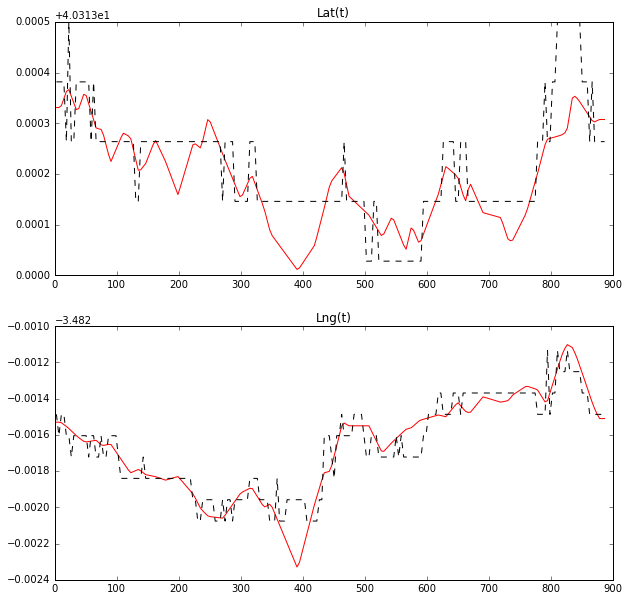

In [25]:
route = 0
# Plot 2D predicitions
plt.figure(1, figsize=(10, 10))
plt.subplot(211)
plt.plot(test_wifi[route].index.values, test_wifi_lat[route].values, 'r',
         test_wifi[route].index.values, predicted_2d[route][:, 0], 'k--')
plt.title('Lat(t)')
plt.subplot(212)
plt.plot(test_wifi[route].index.values, test_wifi_lng[route].values, 'r',
         test_wifi[route].index.values, predicted_2d[route][:, 1], 'k--')
plt.title('Lng(t)')
plt.show()

In [26]:
# Calculate errors
def dtom_calc(local_latitude, mes_d):
    local_radius = 6378137 * np.cos(np.pi * local_latitude / 180)
    mes_m = mes_d * (local_radius * 2 * np.pi) / 360
    return mes_m

test_deg_m_scale = []
for test_i in range(len(test_wifi)):
    test_deg_m_scale.append(dtom_calc(np.median(predicted_2d[test_i][:, 0]), 1))

test_error_wifi = []
for test_i in range(len(test_wifi)):
    error_2d = np.sqrt((predicted_2d[test_i][:, 0] - test_wifi_lat[test_i].values) ** 2 +
                       (predicted_2d[test_i][:, 1] - test_wifi_lng[test_i].values) ** 2) * test_deg_m_scale[test_i]
    error_build = 50 * (predicted_build[test_i] != test_wifi_build[test_i].values)
    error_floor = 15 * np.abs(predicted_floor[test_i] - test_wifi_floor[test_i].values)
    test_error_wifi.append(error_2d + error_floor + error_build)

[[9.8800480868474576], [9.1741755297764964]]


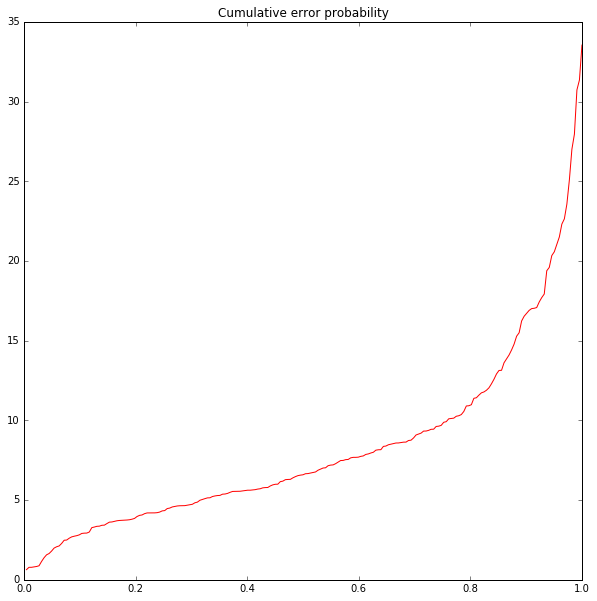

In [27]:
# Plot errors
error_prob_wifi = []
error_ranked_wifi = []
test_error_q3_wifi = []
for test_i in range(len(test_error_wifi)):
    cur_errors = np.sort(test_error_wifi[test_i])
    density = 1 / cur_errors.shape[0]
    error_ranked_wifi.append([cur_errors[0]])
    error_prob_wifi.append([density])
    for err_i in cur_errors[1:]:
        error_prob_wifi[test_i].append(error_prob_wifi[test_i][-1] + density)
        error_ranked_wifi[test_i].append(err_i)
    test_error_q3_wifi.append([cur_errors[int(cur_errors.shape[0] * 3 / 4)]])
print(test_error_q3_wifi)

route = 0
# Plot commulative error of predicitions
plt.figure(1, figsize=(10, 10))
plt.plot(error_prob_wifi[route], error_ranked_wifi[route], 'r')
plt.title('Cumulative error probability')
plt.show()

## GPS 2D prediction

In [28]:
# create gps data frames
gps = []
for i in range(len(track)):
    gps.append([])
    for j in range(len(track[i])):
        gps[-1].append(track[i][j][[1, 3, 4, 5, 6, 7, 8, 9, 10, 'POSI_floor', 'POSI_building', 'interp_lat',
                                    'interp_lon']].iloc[track[i][j][0].values == 'GNSS'])
        gps[-1][-1].columns = ['AppTime', 'GPS_lat', 'GPS_lon', 'GPS_alt', 'GPS_bearing', 'GPS_accuracy', 'GPS_speed', 
                                'GPS_sat_viewed', 'GPS_sat_used', 'POSI_floor', 'POSI_building', 'interp_lat',
                                'interp_lon']
        gps[-1][-1].index = gps[-1][-1]['AppTime'].values
        gps[-1][-1] = gps[-1][-1].drop(['AppTime'], axis=1)
print(gps[0][0].head())
print(gps[0][1].head())

         GPS_lat    GPS_lon  GPS_alt  GPS_bearing  GPS_accuracy  GPS_speed  \
0.389  40.313451  -3.483100  600.238      197.585           6.0        0.0   
0.398  40.313451  -3.483100  600.238      197.585           6.0        0.0   
1.406  40.313449  -3.483100  600.217      197.585           6.0        0.0   
1.416  40.313449  -3.483100  600.217      197.585           6.0        0.0   
2.416  40.313449  -3.483099  600.197      197.585           6.0        0.0   

       GPS_sat_viewed  GPS_sat_used  POSI_floor  POSI_building  interp_lat  \
0.389            15.0          11.0         0.0           10.0   40.313471   
0.398            15.0          11.0         0.0           10.0   40.313471   
1.406            15.0          11.0         0.0           10.0   40.313471   
1.416            15.0          11.0         0.0           10.0   40.313471   
2.416            15.0          11.0         0.0           10.0   40.313471   

       interp_lon  
0.389    -3.48315  
0.398    -3.48315  
1.

In [29]:
# Create test gps routes
test_gps = []
for i in range(len(wifi_dummy_total)):
    for j in range(len(wifi_dummy_total[i])):
        if route_numbering[i][j] == test_route:
            test_gps.append(gps[i][j])
print(test_gps[0].head())

         GPS_lat    GPS_lon  GPS_alt  GPS_bearing  GPS_accuracy  GPS_speed  \
0.724  40.313465  -3.483564  606.319          0.0           8.0        0.0   
0.738  40.313465  -3.483564  606.319          0.0           8.0        0.0   
1.740  40.313465  -3.483564  606.269          0.0           8.0        0.0   
1.815  40.313465  -3.483564  606.269          0.0           8.0        0.0   
2.724  40.313465  -3.483564  606.219          0.0           8.0        0.0   

       GPS_sat_viewed  GPS_sat_used  POSI_floor  POSI_building  interp_lat  \
0.724            14.0           8.0         0.0           10.0   40.313331   
0.738            14.0           8.0         0.0           10.0   40.313331   
1.740            14.0           8.0         0.0           10.0   40.313331   
1.815            14.0           8.0         0.0           10.0   40.313331   
2.724            14.0           8.0         0.0           10.0   40.313331   

       interp_lon  
0.724    -3.48353  
0.738    -3.48353  
1.

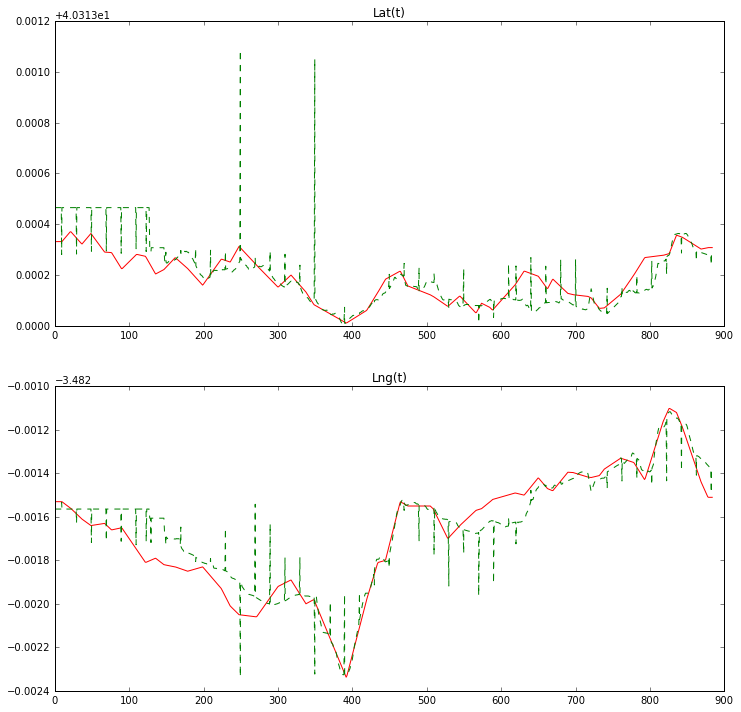

In [30]:
route = 0
# Plot 2D predicitions
plt.figure(1, figsize=(12, 12))
plt.subplot(211)
plt.plot(test_gps[route].index.values, test_gps[route]['interp_lat'].values, 'r',
         test_gps[route].index.values, test_gps[route]['GPS_lat'].values, 'g--')
plt.title('Lat(t)')
plt.subplot(212)
plt.plot(test_gps[route].index.values, test_gps[route]['interp_lon'].values, 'r',
         test_gps[route].index.values, test_gps[route]['GPS_lon'].values, 'g--')
plt.title('Lng(t)')
plt.show()

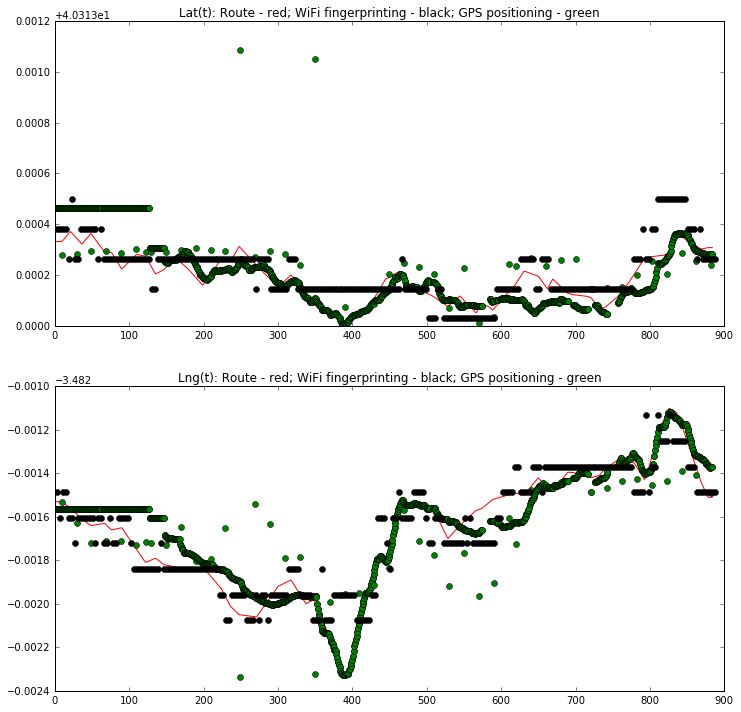

In [31]:
route = 0
# Plot 2D predicitions
plt.figure(1, figsize=(12, 12))
plt.subplot(211)
plt.plot(test_gps[route].index.values, test_gps[route]['interp_lat'].values, 'r',
         test_gps[route].index.values, test_gps[route]['GPS_lat'].values, 'go',
         test_wifi[route].index.values, predicted_2d[route][:, 0], 'ko')
plt.title('Lat(t): Route - red; WiFi fingerprinting - black; GPS positioning - green')
plt.subplot(212)
plt.plot(test_gps[route].index.values, test_gps[route]['interp_lon'].values, 'r',
         test_gps[route].index.values, test_gps[route]['GPS_lon'].values, 'go',
         test_wifi[route].index.values, predicted_2d[route][:, 1], 'ko')
plt.title('Lng(t): Route - red; WiFi fingerprinting - black; GPS positioning - green')
plt.show()

### GPS error estimation

[[11.375068059397014], [10.814710373466479]]


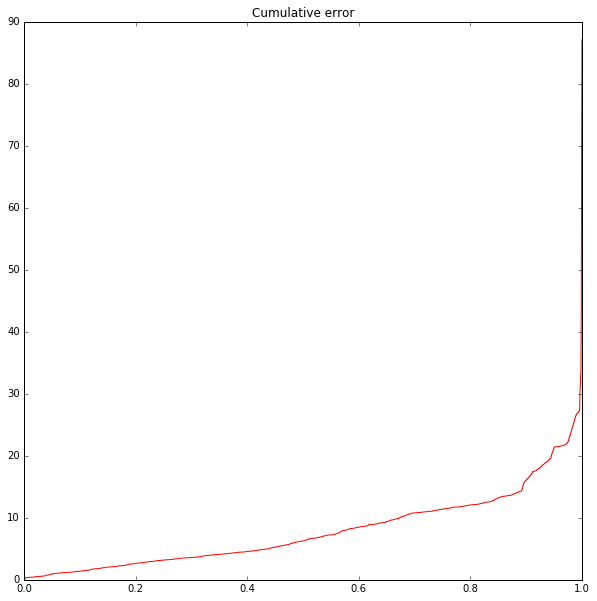

In [32]:
# Get GPS errors
test_error_gps = []
for test_i in range(len(test_gps)):
    error_2d = np.sqrt((test_gps[test_i]['GPS_lat'].values.astype(float) - test_gps[test_i]['interp_lat'].values.astype(float)) ** 2 +
                       (test_gps[test_i]['GPS_lon'].values.astype(float) - test_gps[test_i]['interp_lon'].values.astype(float)) ** 2) * test_deg_m_scale[test_i]
#     error_build = 50 * (predicted_build[test_i] != test_wifi_build[test_i].values)
#     error_floor = 15 * np.abs(predicted_floor[test_i] - test_wifi_floor[test_i].values)
    test_error_gps.append(error_2d)

# Plot errors
error_prob_gps = []
error_ranked_gps = []
test_error_q3_gps = []
for test_i in range(len(test_error_gps)):
    cur_errors = np.sort(test_error_gps[test_i])
    density = 1 / cur_errors.shape[0]
    error_ranked_gps.append([cur_errors[0]])
    error_prob_gps.append([density])
    for err_i in cur_errors[1:]:
        error_prob_gps[test_i].append(error_prob_gps[test_i][-1] + density)
        error_ranked_gps[test_i].append(err_i)
    test_error_q3_gps.append([cur_errors[int(cur_errors.shape[0] * 3 / 4)]])
print(test_error_q3_gps)

route = 0
# Plot commulative error of predicitions
plt.figure(1, figsize=(10, 10))
plt.plot(error_prob_gps[route], error_ranked_gps[route], 'r')
plt.title('Cumulative error')
plt.show()

In [33]:
# Filter GPS with GPS_accuracy < value
# Get GPS errors
test_gps_filtered = []
for test_i in range(len(test_gps)):
    test_gps_filtered.append(test_gps[test_i].iloc[test_gps[test_i]['GPS_accuracy'].values < 7])
    
route = 0
print(test_gps[route].shape[0])
print(test_gps_filtered[route].shape[0])

1719
416


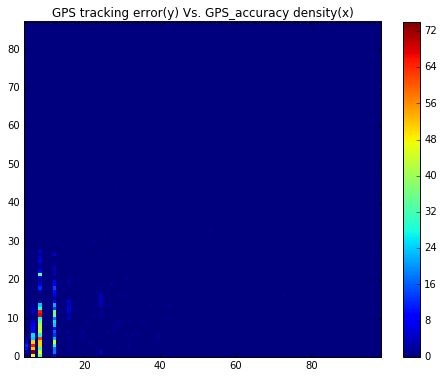

In [34]:
# Plot GPS_error as function of different parameters

# plt.figure(1, figsize=(10, 30))
# plt.subplot(311)
# plt.hist2d(test_gps[route]['GPS_accuracy'].values, test_error_gps[route], bins=100)
# plt.title('GPS_error(GPS_accuracy)')
# plt.colorbar()
# plt.subplot(312)
# plt.hist2d(test_gps[route]['GPS_sat_used'].values, test_error_gps[route], bins=(10, 100))
# plt.title('GPS_error(GPS_sat_used)')
# plt.colorbar()
# plt.subplot(313)
# plt.hist2d(test_gps[route]['GPS_sat_viewed'].values, test_error_gps[route], bins=(20, 100))
# plt.title('GPS_error(GPS_sat_viewed)')
# plt.colorbar()
# plt.show()

plt.figure(1, figsize=(8, 6))
plt.hist2d(test_gps[route]['GPS_accuracy'].values, test_error_gps[route], bins=100)
plt.title('GPS tracking error(y) Vs. GPS_accuracy density(x)')
plt.colorbar()
plt.show()

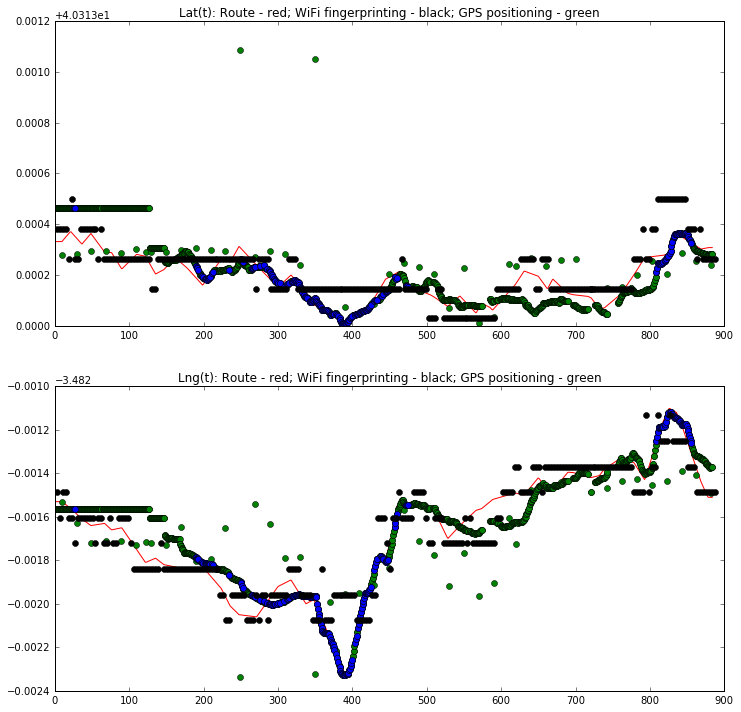

In [35]:
route = 0
# Plot 2D predicitions
plt.figure(1, figsize=(12, 12))
plt.subplot(211)
plt.plot(test_gps[route].index.values, test_gps[route]['interp_lat'].values, 'r',
         test_gps[route].index.values, test_gps[route]['GPS_lat'].values, 'go',
         test_gps_filtered[route].index.values, test_gps_filtered[route]['GPS_lat'].values, 'bo',
         test_wifi[route].index.values, predicted_2d[route][:, 0], 'ko')
plt.title('Lat(t): Route - red; WiFi fingerprinting - black; GPS positioning - green')
plt.subplot(212)
plt.plot(test_gps[route].index.values, test_gps[route]['interp_lon'].values, 'r',
         test_gps[route].index.values, test_gps[route]['GPS_lon'].values, 'go',
         test_gps_filtered[route].index.values, test_gps_filtered[route]['GPS_lon'].values, 'bo',
         test_wifi[route].index.values, predicted_2d[route][:, 1], 'ko')
plt.title('Lng(t): Route - red; WiFi fingerprinting - black; GPS positioning - green')
plt.show()

In [36]:
# Create a test answer with 0.5 seconds intervals
test_sub_timestamps = []
interval = 0.5
for i in range(len(track)):
    for j in range(len(track[i])):
        if route_numbering[i][j] == test_route:
            last_sample_time = track[i][j][1].iloc[-1]
            test_sub_timestamps.append(np.arange(0, last_sample_time, interval))
            print(pos[i][j].head())

     Time index          Lat       Lon FloorID BuildingID ind_begin_time  \
0       0     1  40.31333094  -3.48353       0         10              0   
1   9.656     1  40.31333094  -3.48353       0         10              0   
2   21.33     2  40.31337121  -3.48356       0         10         15.493   
3  36.585     3  40.31332112  -3.48361       0         10        28.9575   
4  48.625     4  40.31336335  -3.48364       0         10         42.605   

  ind_end_time  
0       15.493  
1       15.493  
2      28.9575  
3       42.605  
4      57.8495  
     Time index          Lat       Lon FloorID BuildingID ind_begin_time  \
0       0     1  40.31333094  -3.48353       0         10              0   
1   9.544     1  40.31333094  -3.48353       0         10              0   
2  21.005     2  40.31337121  -3.48356       0         10        15.2745   
3  36.142     3  40.31332112  -3.48361       0         10        28.5735   
4  48.367     4  40.31336335  -3.48364       0         10    

In [37]:
# Interpolate ground truth for the test time stamps
test_sub_results = [] 
test_i = 0
for i in range(len(track)):
    for j in range(len(track[i])):
        if route_numbering[i][j] == test_route:
            test_sub_results.append(pd.DataFrame(np.zeros((test_sub_timestamps[test_i].shape[0], 5)), 
                                                 index=test_sub_timestamps[test_i], 
                                                 columns=['AppTime', 'Lat', 'Lon', 'FloorID', 'BuildingID']))
            interp_ground_truth_lat = interpolate.interp1d(pos[i][j]['Time'].astype(float), pos[i][j]['Lat'])
            interp_ground_truth_lon = interpolate.interp1d(pos[i][j]['Time'].astype(float), pos[i][j]['Lon'])
            interp_ground_truth_floor = interpolate.interp1d(pos[i][j]['Time'].astype(float), pos[i][j]['FloorID'])
            interp_ground_truth_building = interpolate.interp1d(pos[i][j]['Time'].astype(float), pos[i][j]['BuildingID'])
            test_sub_results[test_i]['AppTime'] = test_sub_timestamps[test_i]
            test_sub_results[test_i]['Lat'] = interp_ground_truth_lat(test_sub_results[test_i].index.values)
            test_sub_results[test_i]['Lon'] = interp_ground_truth_lon(test_sub_results[test_i].index.values)
            test_sub_results[test_i]['FloorID'] = interp_ground_truth_floor(test_sub_results[test_i].index.values)
            test_sub_results[test_i]['BuildingID'] = interp_ground_truth_building(test_sub_results[test_i].index.values)
            test_sub_results[test_i]['FloorID'] = (test_sub_results[test_i]['FloorID'].values + 0.5).astype(int)
            test_i += 1

print(test_sub_results[0].head())

     AppTime        Lat      Lon  FloorID  BuildingID
0.0      0.0  40.313331 -3.48353        0        10.0
0.5      0.5  40.313331 -3.48353        0        10.0
1.0      1.0  40.313331 -3.48353        0        10.0
1.5      1.5  40.313331 -3.48353        0        10.0
2.0      2.0  40.313331 -3.48353        0        10.0


In [38]:
# Smooth out

In [39]:
test_sub_wifi_predicitions = [] 
for i in range(len(test_sub_results)):
    test_sub_wifi_predicitions.append(pd.DataFrame(np.zeros(test_sub_results[i].shape), 
                                                   index=test_sub_timestamps[i], 
                                                   columns=['AppTime', 'Lat', 'Lon', 'FloorID', 'BuildingID']))
    # Pad sensors' samples
    latlon_pad_start = predicted_2d[i][0, :]
    latlon_pad_end = predicted_2d[i][-1, :]
    latlon_array = np.vstack((latlon_pad_start, 
                           predicted_2d[i], 
                           latlon_pad_end))
    floor_pad_start = predicted_floor[i][0]
    floor_pad_end = predicted_floor[i][-1]
    floor_array = np.hstack((floor_pad_start, 
                             predicted_floor[i], 
                             floor_pad_end))
    building_pad_start = predicted_build[i][0]
    building_pad_end = predicted_build[i][-1]
    building_array = np.hstack((building_pad_start, 
                               predicted_build[i], 
                               building_pad_end))
    time_pad_start = 0
    time_pad_end = test_sub_timestamps[i][-1]
    time_array = np.hstack((time_pad_start, 
                            test_wifi[i].index.values, 
                            time_pad_end))
    
    # Interpolate sensors' samples
    interp_pred_wifi_lat = interpolate.interp1d(time_array, latlon_array[:, 0])
    interp_pred_wifi_lon = interpolate.interp1d(time_array, latlon_array[:, 1])
    interp_pred_wifi_floor = interpolate.interp1d(time_array, floor_array)
    interp_pred_wifi_building = interpolate.interp1d(time_array, building_array)
    test_sub_wifi_predicitions[i]['AppTime'] = test_sub_timestamps[i]
    test_sub_wifi_predicitions[i]['Lat'] = interp_pred_wifi_lat(test_sub_wifi_predicitions[i]['AppTime'].values)
    test_sub_wifi_predicitions[i]['Lon'] = interp_pred_wifi_lon(test_sub_wifi_predicitions[i]['AppTime'].values)
    test_sub_wifi_predicitions[i]['FloorID'] = interp_pred_wifi_floor(test_sub_wifi_predicitions[i]['AppTime'].values)
    test_sub_wifi_predicitions[i]['BuildingID'] = interp_pred_wifi_building(test_sub_wifi_predicitions[i]['AppTime'].values)
    test_sub_wifi_predicitions[i]['FloorID'] = (test_sub_wifi_predicitions[i]['FloorID'].values + 0.5).astype(int)


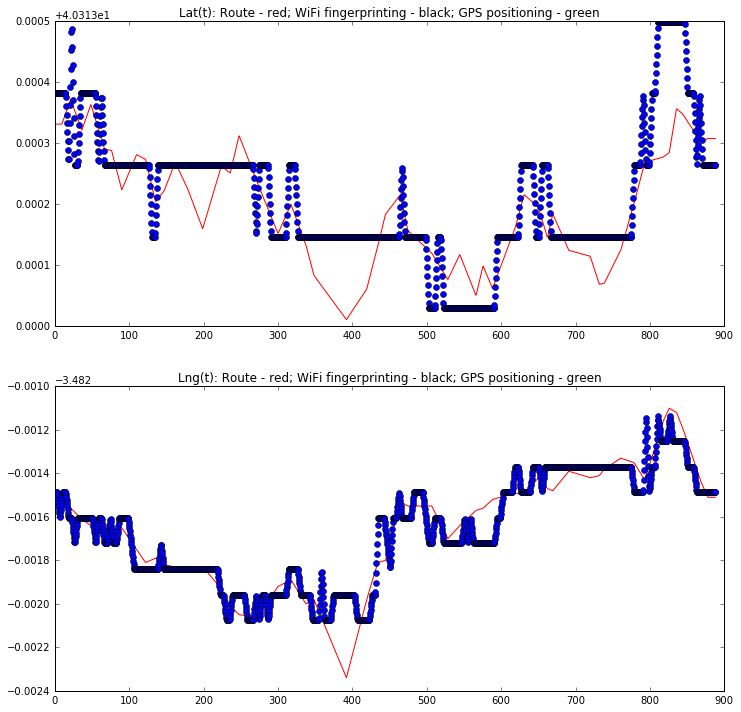

In [40]:
# print an image of the predicitions
route = 0
# Plot 2D predicitions
plt.figure(1, figsize=(12, 12))
plt.subplot(211)
plt.plot(test_sub_results[route]['AppTime'].values, test_sub_results[route]['Lat'].values, 'r',
         test_sub_wifi_predicitions[route]['AppTime'].values, test_sub_wifi_predicitions[route]['Lat'].values, 'bo')
plt.title('Lat(t): Route - red; WiFi fingerprinting - black; GPS positioning - green')
plt.subplot(212)
plt.plot(test_sub_results[route]['AppTime'].values, test_sub_results[route]['Lon'].values, 'r',
         test_sub_wifi_predicitions[route]['AppTime'].values, test_sub_wifi_predicitions[route]['Lon'].values, 'bo')
plt.title('Lng(t): Route - red; WiFi fingerprinting - black; GPS positioning - green')
plt.show()

[[9.0999088765410416], [8.4736870165390084]]


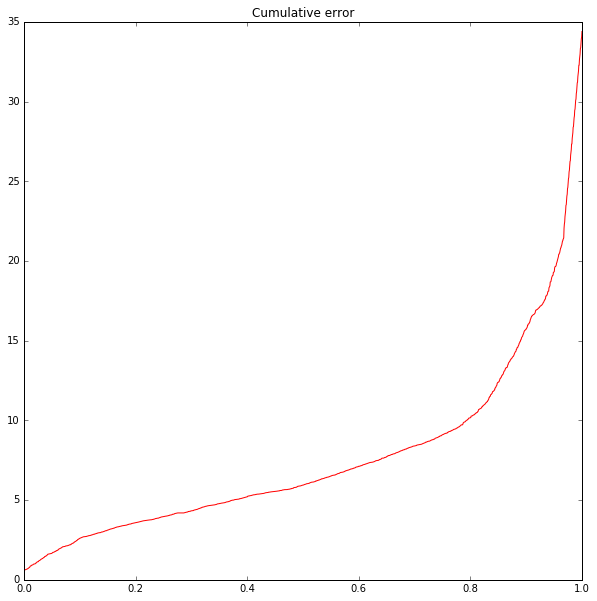

In [41]:
# Calculate submission errors
test_sub_errors = []
for i in range(len(test_gps)):
    error_2d = np.sqrt((test_sub_wifi_predicitions[i]['Lat'].values - test_sub_results[i]['Lat'].values) ** 2 +
                       (test_sub_wifi_predicitions[i]['Lon'].values - test_sub_results[i]['Lon'].values) ** 2) * test_deg_m_scale[i]
    error_build = 50 * (test_sub_wifi_predicitions[i]['BuildingID'].values != test_sub_results[i]['BuildingID'].values)
    error_floor = 15 * np.abs(test_sub_wifi_predicitions[i]['FloorID'].values - test_sub_results[i]['FloorID'].values)
    test_sub_errors.append(error_2d + error_floor + error_build)

# Plot errors
error_sub_prob = []
error_sub_ranked = []
test_sub_error_q3 = []
for i in range(len(test_error_gps)):
    cur_errors = np.sort(test_sub_errors[i])
    density = 1 / cur_errors.shape[0]
    error_sub_ranked.append([cur_errors[0]])
    error_sub_prob.append([density])
    for err_i in cur_errors[1:]:
        error_sub_prob[i].append(error_sub_prob[i][-1] + density)
        error_sub_ranked[i].append(err_i)
    test_sub_error_q3.append([cur_errors[int(cur_errors.shape[0] * 3 / 4)]])
print(test_sub_error_q3)

route = 0
# Plot commulative error of predicitions
plt.figure(1, figsize=(10, 10))
plt.plot(error_sub_prob[route], error_sub_ranked[route], 'r')
plt.title('Cumulative error')
plt.show()

In [49]:
# Add GPS measurements

# Interpolate GPS measurements
test_sub_GPS_predicitions = [] 
for i in range(len(test_sub_results)):
    test_sub_GPS_predicitions.append(pd.DataFrame(np.zeros((test_sub_timestamps[i].shape[0], 3)), 
                                                   index=test_sub_timestamps[i], 
                                                   columns=['AppTime', 'Lat', 'Lon']))
    # Pad GPS samples
    lat_pad_start = test_gps_filtered[i]['GPS_lat'].iloc[0]
    lat_pad_end = test_gps_filtered[i]['GPS_lat'].iloc[-1]
    lat_array = np.hstack((lat_pad_start, 
                           test_gps_filtered[i]['GPS_lat'].values, 
                           lat_pad_end))
    lon_pad_start = test_gps_filtered[i]['GPS_lon'].iloc[0]
    lon_pad_end = test_gps_filtered[i]['GPS_lon'].iloc[-1]
    lon_array = np.hstack((lon_pad_start, 
                           test_gps_filtered[i]['GPS_lon'].values, 
                           lon_pad_end))
    time_pad_start = 0
    time_pad_end = test_sub_timestamps[i][-1]
    time_array = np.hstack((time_pad_start, 
                            test_gps_filtered[i].index.values, 
                            time_pad_end))
    
    # Interpolate sensors' samples
    interp_pred_gps_lat = interpolate.interp1d(time_array, lat_array)
    interp_pred_gps_lon = interpolate.interp1d(time_array, lon_array)
    test_sub_GPS_predicitions[i]['AppTime'] = test_sub_timestamps[i]
    test_sub_GPS_predicitions[i]['Lat'] = interp_pred_gps_lat(test_sub_GPS_predicitions[i]['AppTime'].values)
    test_sub_GPS_predicitions[i]['Lon'] = interp_pred_gps_lon(test_sub_GPS_predicitions[i]['AppTime'].values)

# Find which time stamps are in the region of the good GPS samples
gps_time_area = 1
test_sub_GPS_area = []
for i in range(len(test_sub_timestamps)):
    test_sub_GPS_area.append(np.zeros((test_sub_timestamps[i].shape[0],)))
    for time_i in range(test_sub_timestamps[i].shape[0]):
        for time_measured in test_gps_filtered[i].index.values:
            if not test_sub_GPS_area[i][time_i]:
                if np.abs(test_sub_timestamps[i][time_i] - time_measured) < gps_time_area:
                    test_sub_GPS_area[i][time_i] = 1
                    break

# Add GPS measurement for the solution
test_sub_hybrid_prediction = []
for i in range(len(test_sub_wifi_predicitions)):
    test_sub_hybrid_prediction.append(test_sub_wifi_predicitions[i].copy())
    for j, gps_area in enumerate(test_sub_GPS_area[i]):
        if gps_area:
            test_sub_hybrid_prediction[i]['Lat'].iat[j] = test_sub_GPS_predicitions[i]['Lat'].iat[j]
            test_sub_hybrid_prediction[i]['Lon'].iat[j] = test_sub_GPS_predicitions[i]['Lon'].iat[j]
print(test_sub_hybrid_prediction[0].head())

     AppTime        Lat       Lon  FloorID  BuildingID
0.0      0.0  40.313382 -3.483487        0        10.0
0.5      0.5  40.313382 -3.483487        0        10.0
1.0      1.0  40.313382 -3.483487        0        10.0
1.5      1.5  40.313382 -3.483487        0        10.0
2.0      2.0  40.313382 -3.483487        0        10.0


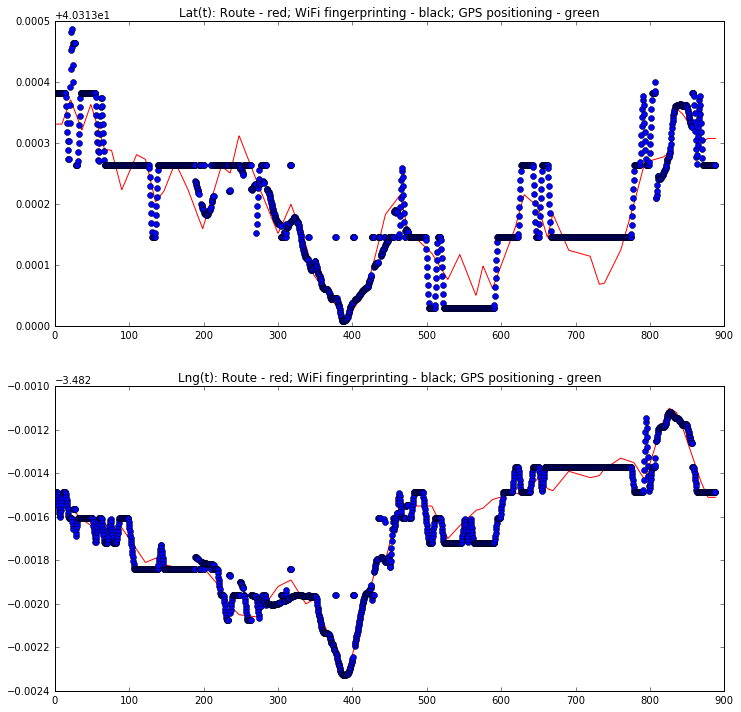

In [50]:
# print an image of hybrid predicitions
route = 0
# Plot 2D predicitions
plt.figure(1, figsize=(12, 12))
plt.subplot(211)
plt.plot(test_sub_results[route]['AppTime'].values, test_sub_results[route]['Lat'].values, 'r',
         test_sub_hybrid_prediction[route]['AppTime'].values, test_sub_hybrid_prediction[route]['Lat'].values, 'bo')
plt.title('Lat(t): Route - red; WiFi fingerprinting - black; GPS positioning - green')
plt.subplot(212)
plt.plot(test_sub_results[route]['AppTime'].values, test_sub_results[route]['Lon'].values, 'r',
         test_sub_hybrid_prediction[route]['AppTime'].values, test_sub_hybrid_prediction[route]['Lon'].values, 'bo')
plt.title('Lng(t): Route - red; WiFi fingerprinting - black; GPS positioning - green')
plt.show()

In [43]:
# Send to file
# np.savetxt('try1.csv', test_sub_wifi_predicitions[0].values, fmt='%.1f %.8f %.8f %d %d', delimiter=',')

In [44]:
# Smoothing
def exp_smooth(time_series, sensor_series, alpha, beta):
    # forward in time
    sensor_forward = np.zeros((sensor_series.shape))
    sensor_trend = np.zeros((sensor_series.shape))
    sensor_forward[0] = sensor_series[0]
    for i in range(1, time_series.shape[0]):
        dt = time_series[i] - time_series[i-1]
        sensor_forward[i] = alpha * sensor_series[i] + (1 - alpha) * (sensor_forward[i-1] + dt * sensor_trend[i-1])
        sensor_trend[i] = beta * (sensor_forward[i] - sensor_forward[i-1]) + (1 - beta) * sensor_trend[i-1]
    # backwards in time
    sensor_backwards = np.zeros((sensor_series.shape))
    sensor_trend = np.zeros((sensor_series.shape))
    sensor_backwards[-1] = sensor_series[-1]
    for i in range(time_series.shape[0]-1, 0, -1):
        dt = time_series[i+1] - time_series[i]
        sensor_backwards[i] = alpha * sensor_series[i] + (1 - alpha) * (sensor_backwards[i+1] + dt * sensor_trend[i+1])
        sensor_trend[i] = beta * (sensor_backwards[i] - sensor_backwards[i+1]) + (1 - beta) * sensor_trend[i+1]
    # print raw, forward, backward to qa
    return sensor_series